#  Exploratory data analysis: vaccine availability and impact in death tolls in different countries

In this notebook, I will first explore the differences of vaccines availability in developed and non-developed countries. I will then perform a simple correlation analysis in order to examine the relation between COVID19 cases, deaths and vaccination in two different countries. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sweetviz as sv

In [2]:
#Importing from GitHub
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid_world= pd.read_csv(url,parse_dates=[0])

In [4]:
covid_world

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198383,ZWE,Africa,Zimbabwe,2022-06-28,255383.0,0.0,66.286,5549.0,0.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
198384,ZWE,Africa,Zimbabwe,2022-06-29,255520.0,137.0,67.286,5553.0,4.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
198385,ZWE,Africa,Zimbabwe,2022-06-30,255586.0,66.0,64.286,5555.0,2.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
198386,ZWE,Africa,Zimbabwe,2022-07-01,255586.0,0.0,39.571,5555.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
# New cases per country
covid_world.groupby(['location']).new_cases.sum()

location
Afghanistan          182651.0
Africa             12057506.0
Albania              282141.0
Algeria              266115.0
Andorra               44177.0
                     ...     
Western Sahara            0.0
World             547713247.0
Yemen                 11825.0
Zambia               325857.0
Zimbabwe             255592.0
Name: new_cases, Length: 244, dtype: float64

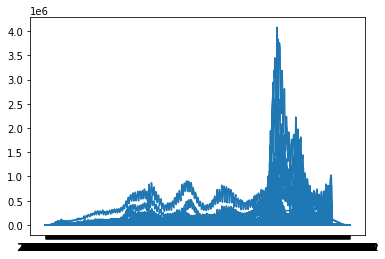

In [5]:
plt.plot(covid_world.date, covid_world.new_cases)

In [6]:
#New variable hosp_vac: the rate of hospital patients and fully vaccinated people worldwide
covid_world['hosp_vac'] = covid_world.hosp_patients / covid_world.people_fully_vaccinated
covid_world.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,hosp_vac
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN


In [7]:
#hosp_vac means grouped by country
covid_world[['hosp_vac','location']].groupby(['location']).mean()

,hosp_vac
location,
Afghanistan,NaN
Africa,NaN
Albania,NaN
Algeria,NaN
Andorra,NaN
...,...
Western Sahara,NaN
World,NaN
Yemen,NaN


In [8]:
#dropping NANs and creating new table
a = covid_world[['hosp_vac','location']].groupby(['location']).mean()
a.dropna()

,hosp_vac
location,
Australia,0.073303
Austria,0.072677
Belgium,1.553745
Bolivia,0.000894
Bulgaria,0.045081
Canada,69.245616
Croatia,0.003593
Cyprus,0.001524
Czechia,77.759505


In [10]:
#creating new table grouping by country and total booster
c = covid_world[['location','total_boosters']].groupby('location').sum()
c

,total_boosters
location,
Afghanistan,0.000000e+00
Africa,2.940992e+09
Albania,1.085797e+07
Algeria,3.330342e+06
Andorra,4.147230e+05
...,...
Western Sahara,0.000000e+00
World,3.096404e+11
Yemen,1.110000e+02


## Exploring vaccination differences between developed and non-developed countries

Taking a 5 countries sample to compute differences.

In [12]:
non_developed = ('Congo','Nigeria','Kenya','Uganda','Zimbabwe')
developed = ('Norway', 'Canada', 'Singapore','Netherlands', 'United Kingdom')

In [13]:
dev = covid_world[covid_world.location.isin(developed)]
dev

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,hosp_vac
31539,CAN,North America,Canada,2020-01-23,2.0,2.0,NaN,NaN,NaN,NaN,...,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN,NaN
31540,CAN,North America,Canada,2020-01-24,3.0,1.0,NaN,NaN,NaN,NaN,...,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN,NaN
31541,CAN,North America,Canada,2020-01-25,3.0,0.0,NaN,NaN,NaN,NaN,...,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN,NaN
31542,CAN,North America,Canada,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,...,16.6,NaN,2.50,82.43,0.929,-883.4,-3.45,-2.39,-23.205895,NaN
31543,CAN,North America,Canada,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,...,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186913,GBR,Europe,United Kingdom,2022-06-28,22739875.0,21412.0,19513.429,180306.0,117.0,60.286,...,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN,NaN
186914,GBR,Europe,United Kingdom,2022-06-29,22777114.0,37239.0,20099.429,180424.0,118.0,66.143,...,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN,NaN
186915,GBR,Europe,United Kingdom,2022-06-30,22800022.0,22908.0,20762.143,180509.0,85.0,67.429,...,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN,NaN
186916,GBR,Europe,United Kingdom,2022-07-01,22822055.0,22033.0,21556.429,180596.0,87.0,70.143,...,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN,NaN


In [134]:
sum_dev=dev.people_fully_vaccinated.sum()
sum_dev

32439428559.0

In [135]:
sum_dev_b= dev.total_boosters.sum()
sum_dev_b

12998593809.0

In [16]:
no_dev = covid_world[covid_world.location.isin(non_developed)]
no_dev

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,hosp_vac
39181,COG,Africa,Congo,2020-03-15,1.0,1.0,NaN,NaN,NaN,NaN,...,52.3,47.964,NaN,64.57,0.574,NaN,NaN,NaN,NaN,NaN
39182,COG,Africa,Congo,2020-03-16,1.0,0.0,NaN,NaN,NaN,NaN,...,52.3,47.964,NaN,64.57,0.574,NaN,NaN,NaN,NaN,NaN
39183,COG,Africa,Congo,2020-03-17,1.0,0.0,NaN,NaN,NaN,NaN,...,52.3,47.964,NaN,64.57,0.574,NaN,NaN,NaN,NaN,NaN
39184,COG,Africa,Congo,2020-03-18,1.0,0.0,NaN,NaN,NaN,NaN,...,52.3,47.964,NaN,64.57,0.574,NaN,NaN,NaN,NaN,NaN
39185,COG,Africa,Congo,2020-03-19,3.0,2.0,NaN,NaN,NaN,NaN,...,52.3,47.964,NaN,64.57,0.574,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198383,ZWE,Africa,Zimbabwe,2022-06-28,255383.0,0.0,66.286,5549.0,0.0,1.857,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN
198384,ZWE,Africa,Zimbabwe,2022-06-29,255520.0,137.0,67.286,5553.0,4.0,1.714,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN
198385,ZWE,Africa,Zimbabwe,2022-06-30,255586.0,66.0,64.286,5555.0,2.0,1.857,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN
198386,ZWE,Africa,Zimbabwe,2022-07-01,255586.0,0.0,39.571,5555.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN


In [132]:
sum_no_dev=no_dev.people_fully_vaccinated.sum()
sum_no_dev

2119175631.0

In [133]:
sum_no_dev_b= no_dev.total_boosters.sum()
sum_no_dev_b

105910490.0

In [137]:
difference_v= sum_dev-sum_no_dev
difference_v

30320252928.0

In [136]:
difference_b= sum_dev_b-sum_no_dev_b
difference_b

12892683319.0

Huge differences in the number of vaccines and boosters available for developed and non-developed countries. 

In [20]:
#Let's take the average gdp_per_capita in the world.

covid_world.gdp_per_capita.mean()

19623.07075964344

In [23]:
#Creating the variable development using the Numpy library and the function np.where

covid_world['Development'] = np.where(covid_world['gdp_per_capita'] >=19623.07075964344, 'Developed','Not_developed')
covid_world

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,hosp_vac,Desarrollo,Development
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198383,ZWE,Africa,Zimbabwe,2022-06-28,255383.0,0.0,66.286,5549.0,0.0,1.857,...,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed
198384,ZWE,Africa,Zimbabwe,2022-06-29,255520.0,137.0,67.286,5553.0,4.0,1.714,...,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed
198385,ZWE,Africa,Zimbabwe,2022-06-30,255586.0,66.0,64.286,5555.0,2.0,1.857,...,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed
198386,ZWE,Africa,Zimbabwe,2022-07-01,255586.0,0.0,39.571,5555.0,0.0,0.857,...,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed


We have a high number of NaNs. So, we will change our code to include a 'Not reported' category for NaNs.

In [24]:
covid_world['Development2'] = np.where(covid_world['gdp_per_capita'] >=19623.07, 'Developed',
                                      (np.where(covid_world['gdp_per_capita'] <19623.07, 'Not_developed',
                                                'Not Reported')))      
covid_world

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,hosp_vac,Desarrollo,Development,Development2
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198383,ZWE,Africa,Zimbabwe,2022-06-28,255383.0,0.0,66.286,5549.0,0.0,1.857,...,61.49,0.571,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed
198384,ZWE,Africa,Zimbabwe,2022-06-29,255520.0,137.0,67.286,5553.0,4.0,1.714,...,61.49,0.571,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed
198385,ZWE,Africa,Zimbabwe,2022-06-30,255586.0,66.0,64.286,5555.0,2.0,1.857,...,61.49,0.571,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed
198386,ZWE,Africa,Zimbabwe,2022-07-01,255586.0,0.0,39.571,5555.0,0.0,0.857,...,61.49,0.571,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed


In [25]:
# We check the unique values of our variable Development 2
covid_world.Development2.unique()

array(['Not_developed', 'Not Reported', 'Developed'], dtype=object)

In [ ]:
#We can now delete the Development variable created earlier because it skewed our results.
covid_world.drop(columns=['Development'],inplace=True)

In [26]:
#Let's find the total value of boosters as a function of our variable Development2.
boosters = covid_world[['Development2','total_boosters']].groupby('Development2').sum()
boosters

,total_boosters
Development2,
Developed,1.069772e+11
Not Reported,6.650620e+11
Not_developed,3.715579e+11


In [27]:
#formatting the results to decimal notation
pd.set_option('float_format', '{:f}'.format)
boosters

,total_boosters
Development2,
Developed,106977188552.000000
Not Reported,665062000595.000000
Not_developed,371557905363.000000


In [44]:
#How many people aere fully vaccinated  per continent? 
vaccines= covid_world.groupby('continent').people_fully_vaccinated.sum() 
vaccines

continent
Africa           12349077113.000000
Asia            443816034345.000000
Europe          132062759349.000000
North America   117584518079.000000
Oceania           6982731164.000000
South America    79644379614.000000
Name: people_fully_vaccinated, dtype: float64

In [28]:
#How many boosters have been made available per continent? 

boosters2 = covid_world.groupby('continent').total_boosters.sum()
boosters2
#float format
pd.set_option('float_format', '{:f}'.format)
boosters2

continent
Africa            790906405.000000
Asia            68811430090.000000
Europe          45857737581.000000
North America   28216958034.000000
Oceania          2466884481.000000
South America   25404432315.000000
Name: total_boosters, dtype: float64

In [41]:
#proportion of vaccinated people as a function of population
covid_world['vac_pop'] = covid_world.people_fully_vaccinated / covid_world.population
covid_world.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,hosp_vac,Desarrollo,Development,Development2,vac_pop
0,AFG,Asia,Afghanistan,2020-02-24,5.000000,5.000000,NaN,NaN,NaN,NaN,...,0.511000,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.000000,0.000000,NaN,NaN,NaN,NaN,...,0.511000,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.000000,0.000000,NaN,NaN,NaN,NaN,...,0.511000,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.000000,0.000000,NaN,NaN,NaN,NaN,...,0.511000,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.000000,0.000000,NaN,NaN,NaN,NaN,...,0.511000,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN


In [42]:
#Mean of vaccinated people as a proportion of the total population.
covid_world.groupby('continent').vac_pop.mean()

continent
Africa          0.131427
Asia            0.412520
Europe          0.431800
North America   0.399428
Oceania         0.428840
South America   0.421201
Name: vac_pop, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

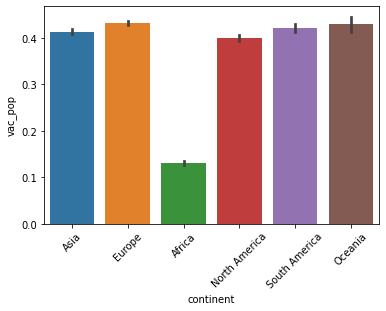

In [49]:
#displayed as simple barplot
sns.barplot(x ='continent', y ='vac_pop',data = covid_world)
plt.xticks(rotation=45)

In [50]:
#proportion of boosters as a function of population
covid_world['boosters_pop'] = covid_world.total_boosters / covid_world.population
covid_world.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,hosp_vac,Desarrollo,Development,Development2,vac_pop,boosters_pop
0,AFG,Asia,Afghanistan,2020-02-24,5.000000,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN


In [51]:
#Mean of vaccinated people as a proportion of the total population.
covid_world.groupby('continent').boosters_pop.mean()

continent
Africa          0.046322
Asia            0.254041
Europe          0.235922
North America   0.162731
Oceania         0.220873
South America   0.253712
Name: boosters_pop, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

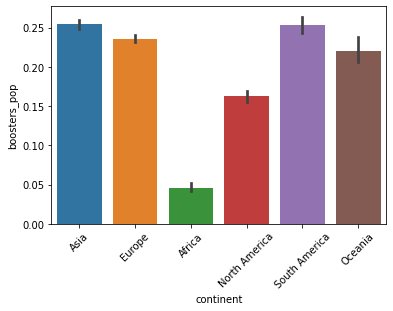

In [52]:
#displayed as simple barplot
sns.barplot(x ='continent', y ='boosters_pop',data = covid_world)
plt.xticks(rotation=45)

## Evaluating linear-like relationships: Mexico dataset 

In [53]:
covid_mx= covid_world[covid_world.location == "Mexico"]

In [54]:
covid_mx


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,hosp_vac,Desarrollo,Development,Development2,vac_pop,boosters_pop
115163,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
115164,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
115165,MEX,North America,Mexico,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
115166,MEX,North America,Mexico,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
115167,MEX,North America,Mexico,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,-33.700000,-0.200000,-0.200000,-0.258709,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116072,MEX,North America,Mexico,2022-06-28,5986917.000000,20959.000000,13618.286000,325638.000000,42.000000,25.714000,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
116073,MEX,North America,Mexico,2022-06-29,5986917.000000,0.000000,13618.286000,325638.000000,0.000000,25.714000,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
116074,MEX,North America,Mexico,2022-06-30,6034602.000000,47685.000000,18235.571000,325716.000000,78.000000,32.714000,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN
116075,MEX,North America,Mexico,2022-07-01,6058689.000000,24087.000000,19371.857000,325747.000000,31.000000,33.714000,...,NaN,NaN,NaN,NaN,NaN,Subdesarrollado,Not_developed,Not_developed,NaN,NaN


In [ ]:
report = sv.analyze(covid_mx)

                                             |                                             | [  0%]   00:00 ->…

In [ ]:
report.show_html('Covid en Mexico.html')

Report Covid en Mexico.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


This dataset contains a lot of NaNs in many of the variables of interest, such as ICU patients and hospitalized patients. I will drop these NaNs. 

In [ ]:
covid_mx.dropna(how= 'all', axis=1, inplace=True)

In [ ]:
covid_mx

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,96636,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
1,96637,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
2,96638,MEX,North America,Mexico,2020-01-03,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
3,96639,MEX,North America,Mexico,2020-01-04,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
4,96640,MEX,North America,Mexico,2020-01-05,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,-78.5,-0.47,-0.47,-0.602631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,97416,MEX,North America,Mexico,2022-02-19,5407711.0,41306.0,17694.143,315525.0,927.0,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
781,97417,MEX,North America,Mexico,2022-02-20,5413425.0,5714.0,18510.429,315688.0,163.0,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
782,97418,MEX,North America,Mexico,2022-02-21,5413425.0,0.0,17245.571,315688.0,0.0,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
783,97419,MEX,North America,Mexico,2022-02-22,5418257.0,4832.0,16817.143,315786.0,98.0,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN


In [ ]:
#analyzing again, without NaNs 
report2 = sv.analyze(covid_mx)

                                             |                                             | [  0%]   00:00 ->…

In [ ]:
report2.show_html('Covid en Mexico.html')

Report Covid en Mexico.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
report2

In [59]:
subset= covid_mx[['new_deaths', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations']]

In [ ]:
subset

,new_deaths,people_vaccinated,people_fully_vaccinated,total_vaccinations
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
780,927.0,NaN,NaN,NaN
781,163.0,85041305.0,78663516.0,177918897.0
782,0.0,85050217.0,78680575.0,178130383.0
783,98.0,NaN,NaN,NaN


Text(0, 0.5, ' COVID-19 deaths (1e7)')

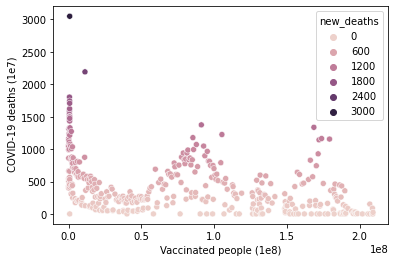

In [62]:
sns.scatterplot(x='total_vaccinations',y='new_deaths',hue= 'new_deaths', data= subset)
plt.xlabel('Vaccinated people (1e8)')
plt.ylabel(' COVID-19 deaths (1e7)')

Pearson correlation is calculated as a default option in the correlation matrix function from Pandas. I will specify this correlation method one time for clarity, but I will omit to do so again in further analysis cells.
Of note, if you need to perform Spearman or Kendalls correlation analyses, you will need to specify it in the method argument. 
I will perform Hoeffidings D on this data below. For now, I will compute pearson correlation.

In [84]:
# Pearson correlation matrix for new deaths and vaccinations
corrMatrix = subset.corr(method='pearson')
print (corrMatrix)

                         new_deaths  people_vaccinated  \
new_deaths                 1.000000          -0.415826   
people_vaccinated         -0.415826           1.000000   
people_fully_vaccinated   -0.369711           0.975591   
total_vaccinations        -0.412227           0.974139   

                         people_fully_vaccinated  total_vaccinations  
new_deaths                             -0.369711           -0.412227  
people_vaccinated                       0.975591            0.974139  
people_fully_vaccinated                 1.000000            0.992841  
total_vaccinations                      0.992841            1.000000  


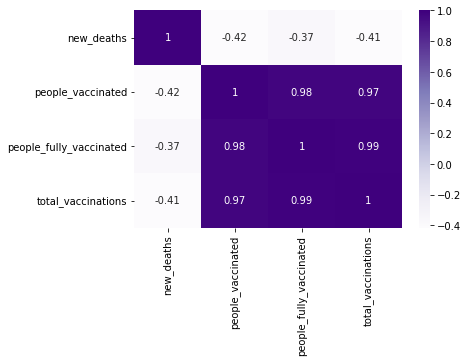

In [85]:
#correlation heatmap
sns.heatmap(corrMatrix, cmap="Purples", annot=True)
plt.show()

Text(0, 0.5, ' COVID-19 cases (1e7)')

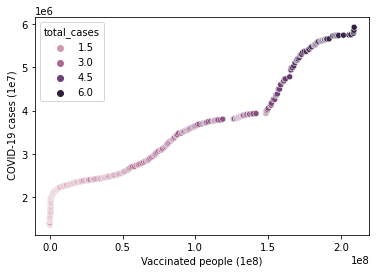

In [56]:
sns.scatterplot(x='total_vaccinations',y='total_cases',hue= 'total_cases', data= covid_mx)
plt.xlabel('Vaccinated people (1e8)')
plt.ylabel(' COVID-19 cases (1e7)')

In [67]:
subset2= covid_mx[['new_cases', 'total_cases', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations']] 

In [74]:
corrMatrix2 = subset2.corr()#omiting method, because it is the default choice.
print (corrMatrix2)

                         new_cases  total_cases  people_vaccinated  \
new_cases                 1.000000     0.179734           0.154283   
total_cases               0.179734     1.000000           0.929126   
people_vaccinated         0.154283     0.929126           1.000000   
people_fully_vaccinated   0.187621     0.959486           0.975591   
total_vaccinations        0.147449     0.980342           0.974139   

                         people_fully_vaccinated  total_vaccinations  
new_cases                               0.187621            0.147449  
total_cases                             0.959486            0.980342  
people_vaccinated                       0.975591            0.974139  
people_fully_vaccinated                 1.000000            0.992841  
total_vaccinations                      0.992841            1.000000  


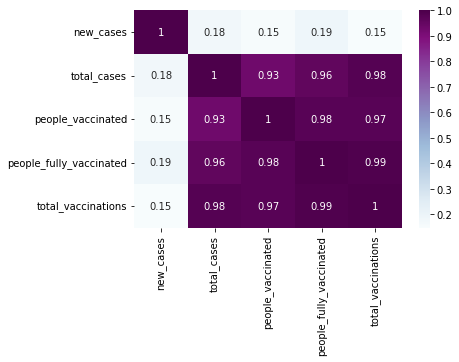

In [70]:
sns.heatmap(corrMatrix2, cmap="BuPu", annot=True)
plt.show()

Now swithching to a more complete dataset, which is the UK dataset.

In [75]:
covid_uk= covid_world[covid_world.location == "United Kingdom"]

In [ ]:
covid_uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
142775,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
142776,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
142777,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,-1956.3,-2.68,-5.6,-28.681759
142778,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
142779,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143473,GBR,Europe,United Kingdom,2021-12-29,12585924.0,223621.0,130796.429,148202.0,69.0,73.857,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
143474,GBR,Europe,United Kingdom,2021-12-30,12774849.0,188925.0,140248.571,148534.0,332.0,100.286,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
143475,GBR,Europe,United Kingdom,2021-12-31,12965393.0,190544.0,150067.714,148737.0,203.0,109.714,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
143476,GBR,Europe,United Kingdom,2022-01-01,13127965.0,162572.0,173292.286,148891.0,154.0,131.714,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN


In [ ]:
report_uk = sv.analyze(covid_uk)

                                             |                                             | [  0%]   00:00 ->…

In [ ]:
report_uk.show_html('Covid in UK.html')

Report Covid en UK.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


This is a more complete dataset, but it still lacks some information. I will drop the missing values. 

In [77]:
covid_uk2= covid_uk.dropna(how= 'all', axis=1)

In [ ]:
covid_uk2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
142775,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,4.28,20.0,24.7,2.54,81.32,0.932,NaN,NaN,NaN,NaN
142776,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,4.28,20.0,24.7,2.54,81.32,0.932,NaN,NaN,NaN,NaN
142777,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,4.28,20.0,24.7,2.54,81.32,0.932,-1956.3,-2.68,-5.6,-28.681759
142778,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,4.28,20.0,24.7,2.54,81.32,0.932,NaN,NaN,NaN,NaN
142779,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,4.28,20.0,24.7,2.54,81.32,0.932,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143473,GBR,Europe,United Kingdom,2021-12-29,12585924.0,223621.0,130796.429,148202.0,69.0,73.857,...,4.28,20.0,24.7,2.54,81.32,0.932,NaN,NaN,NaN,NaN
143474,GBR,Europe,United Kingdom,2021-12-30,12774849.0,188925.0,140248.571,148534.0,332.0,100.286,...,4.28,20.0,24.7,2.54,81.32,0.932,NaN,NaN,NaN,NaN
143475,GBR,Europe,United Kingdom,2021-12-31,12965393.0,190544.0,150067.714,148737.0,203.0,109.714,...,4.28,20.0,24.7,2.54,81.32,0.932,NaN,NaN,NaN,NaN
143476,GBR,Europe,United Kingdom,2022-01-01,13127965.0,162572.0,173292.286,148891.0,154.0,131.714,...,4.28,20.0,24.7,2.54,81.32,0.932,NaN,NaN,NaN,NaN


In [78]:
covid_uk_clean= covid_uk2.drop(columns=['excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million'])

In [ ]:
covid_uk_clean

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
142775,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932
142776,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932
142777,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932
142778,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932
142779,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143473,GBR,Europe,United Kingdom,2021-12-29,12585924.0,223621.0,130796.429,148202.0,69.0,73.857,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932
143474,GBR,Europe,United Kingdom,2021-12-30,12774849.0,188925.0,140248.571,148534.0,332.0,100.286,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932
143475,GBR,Europe,United Kingdom,2021-12-31,12965393.0,190544.0,150067.714,148737.0,203.0,109.714,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932
143476,GBR,Europe,United Kingdom,2022-01-01,13127965.0,162572.0,173292.286,148891.0,154.0,131.714,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932


In [ ]:
report_uk2 = sv.analyze(covid_uk_clean)

                                             |                                             | [  0%]   00:00 ->…

In [ ]:
report_uk2.show_html('Covid en UK.html')

Report Covid en UK.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [79]:
subset_uk= covid_uk[['new_cases', 'total_cases', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations']] 

Text(0, 0.5, ' COVID-19 cases (1e7)')

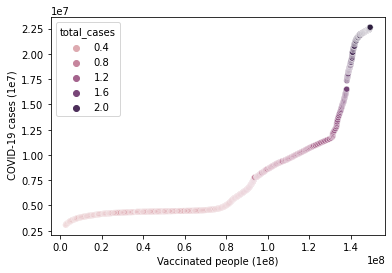

In [86]:
sns.scatterplot(x='total_vaccinations',y='total_cases',hue= 'total_cases', data= subset_uk)
plt.xlabel('Vaccinated people (1e8)')
plt.ylabel(' COVID-19 cases (1e7)')

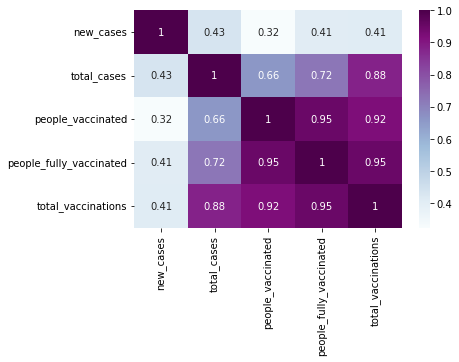

In [83]:
corrMatrix_uk_cases = subset_uk.corr()
sns.heatmap(corrMatrix_uk_cases, cmap="BuPu", annot=True)
plt.show()

## Evaluating complex relationships between variables

In [109]:
subset_uk2= covid_uk_clean[['new_deaths', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations', 'icu_patients', 'hosp_patients', 'weekly_hosp_admissions','new_deaths_smoothed']] 

Text(0, 0.5, ' COVID-19 cases (1e7)')

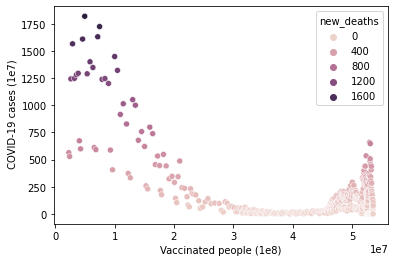

In [104]:
sns.scatterplot(x='people_vaccinated',y='new_deaths',hue= 'new_deaths', data= subset_uk2)
plt.xlabel('Vaccinated people (1e8)')
plt.ylabel(' COVID-19 cases (1e7)')

In [ ]:
sns.scatterplot(x='people_vaccinated',y='new_deaths',hue= 'new_deaths', data= subset_uk2)
plt.xlabel('Vaccinated people (1e8)')
plt.ylabel(' COVID-19 cases (1e7)')

Text(0, 0.5, ' COVID-19 cases (1e7)')

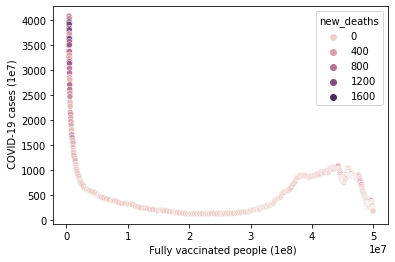

In [127]:
sns.scatterplot(x='people_fully_vaccinated',y='icu_patients',hue= 'new_deaths', data= subset_uk2)
plt.xlabel(' Fully vaccinated people (1e8)')
plt.ylabel(' COVID-19 cases (1e7)')

Text(0, 0.5, ' COVID-19 cases (1e7)')

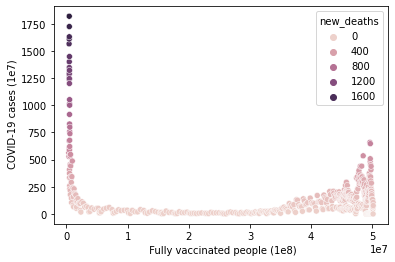

In [129]:
sns.scatterplot(x='people_fully_vaccinated',y='new_deaths',hue= 'new_deaths', data= subset_uk2)
plt.xlabel(' Fully vaccinated people (1e8)')
plt.ylabel(' COVID-19 cases (1e7)')

Look at the complex relationship between these variables. They all display the same kind of descending exponential distribution and a peak at the end of the scatterplot. I will first transform these variables and then apply Hoeffidings D statistic. Hoeffding’s test for dependence was proposed by Wassily Hoeffding (1948) as a test of correlation for two variables with continuous distribution functions. Hoeffding’s D is a nonparametric measure of the distance between the joint distribution F(x, y) and the product of marginal distributions F1(x)F2(y). The advantage of this statistic lies in the fact that it has more power to detect non-monotonic dependency structures compared to other more common measures (Pearson, Kendall, Spearman). 
Code is available at: https://github.com/PaulVanDev/HoeffdingD.

In [116]:
#transforming to log2+1 
subset_uk3 = subset_uk2.transform(lambda x: np.log2(x+1))

Text(0, 0.5, ' COVID-19 cases (1e7)')

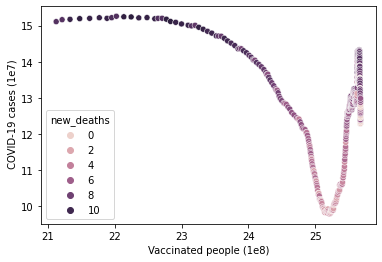

In [128]:
sns.scatterplot(x='people_vaccinated',y='hosp_patients',hue= 'new_deaths', data= subset_uk3)
plt.xlabel('Vaccinated people (1e8)')
plt.ylabel(' COVID-19 cases (1e7)')

In [122]:
from  XtendedCorrel import hoeffding

In [123]:
#complex UK data
subset_uk3.corr(method=hoeffding)

,new_deaths,people_vaccinated,people_fully_vaccinated,total_vaccinations,icu_patients,hosp_patients,weekly_hosp_admissions,new_deaths_smoothed
new_deaths,1.000000,0.035995,0.036203,0.036188,0.255204,0.339134,0.274647,0.403822
people_vaccinated,0.035995,1.000000,0.953360,0.952841,0.116276,0.151442,0.125840,0.093769
people_fully_vaccinated,0.036203,0.953360,1.000000,0.954183,0.116638,0.152472,0.126296,0.093155
total_vaccinations,0.036188,0.952841,0.954183,1.000000,0.116856,0.152478,0.126207,0.093091
icu_patients,0.255204,0.116276,0.116638,0.116856,1.000000,0.277929,0.235683,0.321492
hosp_patients,0.339134,0.151442,0.152472,0.152478,0.277929,1.000000,0.627457,0.545535
weekly_hosp_admissions,0.274647,0.125840,0.126296,0.126207,0.235683,0.627457,1.000000,0.359413
new_deaths_smoothed,0.403822,0.093769,0.093155,0.093091,0.321492,0.545535,0.359413,1.000000


In [125]:
#complex Mexican data from above
subset_uk3.corr(method=hoeffding)

,new_deaths,people_vaccinated,people_fully_vaccinated,total_vaccinations,icu_patients,hosp_patients,weekly_hosp_admissions,new_deaths_smoothed
new_deaths,1.000000,0.035995,0.036203,0.036188,0.255204,0.339134,0.274647,0.403822
people_vaccinated,0.035995,1.000000,0.953360,0.952841,0.116276,0.151442,0.125840,0.093769
people_fully_vaccinated,0.036203,0.953360,1.000000,0.954183,0.116638,0.152472,0.126296,0.093155
total_vaccinations,0.036188,0.952841,0.954183,1.000000,0.116856,0.152478,0.126207,0.093091
icu_patients,0.255204,0.116276,0.116638,0.116856,1.000000,0.277929,0.235683,0.321492
hosp_patients,0.339134,0.151442,0.152472,0.152478,0.277929,1.000000,0.627457,0.545535
weekly_hosp_admissions,0.274647,0.125840,0.126296,0.126207,0.235683,0.627457,1.000000,0.359413
new_deaths_smoothed,0.403822,0.093769,0.093155,0.093091,0.321492,0.545535,0.359413,1.000000


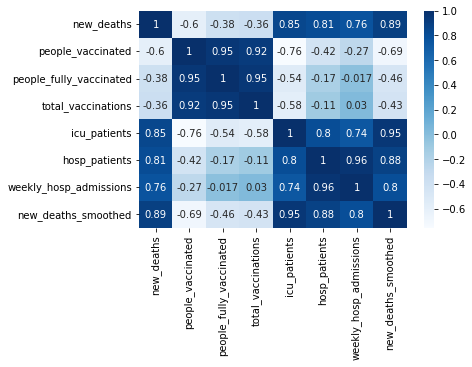

In [121]:
corrMatrix_uk_deaths = subset_uk2.corr(method= 'pearson')
sns.heatmap(corrMatrix_uk_deaths, cmap="Blues", annot=True)
plt.show()

In [130]:
subset.corr(method=hoeffding)

,new_deaths,people_vaccinated,people_fully_vaccinated,total_vaccinations
new_deaths,1.000000,0.079809,0.060891,0.083403
people_vaccinated,0.079809,1.000000,0.956528,0.956471
people_fully_vaccinated,0.060891,0.956528,1.000000,0.956823
total_vaccinations,0.083403,0.956471,0.956823,1.000000


The Pearson correlation has the advantage of showing both positive and negative associations. Take note of how negatively correlated new deaths is with other factors, such as vaccinated people and total vaccinations. This is also the case with other variables such as hospital patients and icu patients. The Hoeffding association, in contrast, rates dependence\ independence associations. Although there is a weak correlation between new deaths and the vaccination variables, the table of Hoeffding statistics does not indicate the direction of the correlation. In summary, for non monotonical and non linear associations such as the above variables, we need to perform both correlation tests. 

## Calculating p values
Of course, we need p values to confirm the validity of our tests. I implemented a custom function to compute  Pearson coefficient p values.

In [95]:
from scipy.stats import pearsonr

In [96]:
'''Calculates all the p values from a dataframe, using 
pearson correlation coefficients.
This function can be customized to calculate spearman and kendall p values as well.
'''


def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues
#calculating p values from the subset_uk2 dataframe
calculate_pvalues(subset_uk2)

,new_deaths,people_vaccinated,people_fully_vaccinated,total_vaccinations,icu_patients,hosp_patients,weekly_hosp_admissions,new_deaths_smoothed
new_deaths,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
people_vaccinated,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
people_fully_vaccinated,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.969100,0.000000
total_vaccinations,0.000000,0.000000,0.000000,0.000000,0.000000,0.086800,0.166400,0.000000
icu_patients,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hosp_patients,0.000000,0.000000,0.000500,0.086800,0.000000,0.000000,0.000000,0.000000
weekly_hosp_admissions,0.000000,0.000000,0.969100,0.166400,0.000000,0.000000,0.000000,0.000000
new_deaths_smoothed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In summary, huge differences between developed and un-developed countries exist in the COVID19 pandemic context.Tthis is true  not only for vaccines and boosters avalilability, but also for clean and complete datasets that can allow us to make some inferences. 